## **Exploratory analysis report**

The exploratory data analysis, or EDA, is a phase in machine learning project allowing to understand the data as well as the relation between the predictive variable and the target. This part allow also to determined the type of problem we have to solve by machine learning. 

This dataset come from Kochan *et al*,2023 which aim to described the winner and loser of reef flattening on Florida's Coral Reef by using comprehensive species- and trait-based approaches to link current estimates of structural complexity and coral cover to current fish diversities and identify trait that predict those density. 

To understand the data set we explored it by descriptive statistics methods as weel as visualisation of the data repartition in function of the relation between the variables and the relations between variables and the target. We choose to explore 2 data sets, the species and the trait, and to divided this report in 2 parts with one for each data set. 

In [30]:
#Library needed for doing the exploratory analysis

#For dataframe manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #This line allow to display the entire variables in a dataframe 

#For the data vizualisation
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv

#For statistical and correlation analysis
from dython.nominal import identify_nominal_columns, associations 


In [2]:
#Importing dataset for the study

#For the species data set
df = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

#For the trait data set
df2= pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx")

## Species dataset exploration

In [3]:
df.head(10)

site    model  Year   Month   Latitude  Longitude      Depth  \
Index                                                                         
0      4733520_128U  biomass  2005  August  24.446433 -81.962900   9.800000   
1      4966028_487U   impact  2005    June  24.461130 -81.840099   8.821212   
2      4981032_102U  biomass  2005    July  24.467250 -81.832367  17.399239   
3      4999782_141U   impact  2005  August  24.468767 -81.822167   9.200000   
4      5026033_475U   impact  2005    June  24.470206 -81.808148   8.558032   
5      5067281_105U  biomass  2005    July  24.466283 -81.786533  26.504821   
6      5157285_104U   impact  2005    July  24.474067 -81.739067   8.696966   
7      5168534_472U  biomass  2005    June  24.471833 -81.733867  20.300000   
8      5187287_495U  biomass  2005    June  24.477337 -81.722680  20.463554   
9      5194788_112U  biomass  2005    July  24.479050 -81.718833   9.500000   

         Region  Coral_cover  Reef_complexity        SST         NPP  \
Index                                                                  
0      FLA KEYS     2.000000         0.550322  23.595392  550.865051   
1      FLA KEYS     6.181818         1.886364  23.578271  577.431946   
2      FLA KEYS     7.506345         0.749873  23.551355  595.320252   
3      FLA KEYS    10.000000         0.400000  23.556451  590.443543   
4      FLA KEYS     2.870486         0.289415  23.567590  579.874023   
5      FLA KEYS    17.620519         1.200000  23.631006  548.318603   
6      FLA KEYS    25.018963         1.149431  23.673700  547.846313   
7      FLA KEYS     6.000000         1.300000  23.692407  539.073120   
8      FLA KEYS     9.817768         1.700000  23.698419  548.660706   
9      FLA KEYS     2.493606         0.849361  23.702264  551.645569   

       Wave_exposure      Habitat_type_classLV0 Habitat_type_classLV2  \
Index                                                                   
0           6.992729  Coral Reef and Hardbottom        Aggregate Reef   
1           6.950751  Coral Reef and Hardbottom       Spur and Groove   
2           6.950181  Coral Reef and Hardbottom              Pavement   
3           6.959807  Coral Reef and Hardbottom              Pavement   
4           6.914992  Coral Reef and Hardbottom              Pavement   
5           7.016505  Coral Reef and Hardbottom       Spur and Groove   
6           6.674624  Coral Reef and Hardbottom              Pavement   
7           6.896012  Coral Reef and Hardbottom              Pavement   
8           6.492898  Coral Reef and Hardbottom        Aggregate Reef   
9           7.095299  Coral Reef and Hardbottom              Pavement   

       Coral_area_UFRTM_20km  Coral_area_UFRTM_200km  Depth_Sbrocco  \
Index                                                                 
0                      88333                 1040643          -10.0   
1                      91742                 1057990           -6.0   
2                      94607                 1058988           -7.0   
3                      96139                 1060134           -7.0   
4                      98167                 1061388          -14.0   
5                      95312                 1063041          -13.0   
6                     101151                 1067710           -9.0   
7                     100667                 1067974          -18.0   
8                     103773                 1069342          -11.0   
9                     105049                 1069679          -11.0   

         Deepwater          FSA  Marina_slips_10km  Marina_slips_25km  \
Index                                                                   
0      1182.842773  3621.320313                  0                391   
1      1048.528198  7731.371094                  0                733   
2      1441.421387  6641.421387                  0                733   
3      1341.421387  5641.421387                  0                733   
4       900.000000  4324.264160  

In [4]:
#look at the info on the dataset to see which type of data it contain as well as the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [5]:
#Look at the variables content meaning multiples different values or unique value.
df.nunique()

site                           3999
model                             2
Year                             12
Month                             8
Latitude                       3984
Longitude                      3969
Depth                          3293
Region                            3
Coral_cover                    2414
Reef_complexity                2814
SST                            3428
NPP                            3660
Wave_exposure                  3673
Habitat_type_classLV0             3
Habitat_type_classLV2             8
Coral_area_UFRTM_20km          3253
Coral_area_UFRTM_200km         3608
Depth_Sbrocco                    64
Deepwater                       787
FSA                            3065
Marina_slips_10km               543
Marina_slips_25km               508
Marine_reserve                    2
Population_20km                1051
Population_50km                1039
Recreational_fishermen_50km    1009
Tourist_fishing                1800
Artificial_reefs_1km        

In [9]:
#Counting the number of missing value in each variables
df.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

In [10]:
#Statistic descriptive of the datasets
df.describe()

Year     Latitude    Longitude        Depth  Coral_cover  \
count  3999.000000  3999.000000  3999.000000  3999.000000  3292.000000   
mean   2012.886222    25.361813   -80.912910    12.031226     4.549820   
std       3.629448     0.806724     1.051129     6.942690     5.522744   
min    2005.000000    24.431943   -82.986818     1.300482     0.000000   
25%    2011.000000    24.632586   -81.695419     6.351316     1.500000   
50%    2013.000000    25.123213   -80.292226    10.171806     2.758143   
75%    2016.000000    26.034196   -80.092946    17.148568     5.283544   
max    2018.000000    27.189445   -79.993800    32.295441    55.000000   

       Reef_complexity          SST          NPP  Wave_exposure  \
count      3292.000000  3999.000000  3999.000000    3999.000000   
mean          1.100154    23.760696   523.320811       7.322459   
std           0.851008     0.552442   163.404174       0.211270   
min           0.075887    22.405206   287.664307       5.213092   
25%           0.500000    23.608484   365.925385       7.294437   
50%           0.900596    23.929285   533.677063       7.368210   
75%           1.448243    24.200861   632.628479       7.455595   
max          10.538338    24.436212  1330.589233       7.597482   

       Coral_area_UFRTM_20km  Coral_area_UFRTM_200km  Depth_Sbrocco  \
count            3999.000000            3.999000e+03    3999.000000   
mean            76727.255314            9.204478e+05     -13.858828   
std             44693.794158            2.372087e+05       8.434335   
min             12257.000000            3.420410e+05     -56.000000   
25%             50594.000000            8.440460e+05     -20.000000   
50%             60682.000000            9.595900e+05     -12.000000   
75%             91516.000000            1.103821e+06      -7.000000   
max            280125.000000            1.203928e+06      -2.000000   

          Deepwater           FSA  Marina_slips_10km  Marina_slips_25km  \
count   3999.000000   3999.000000        3999.000000        3999.000000   
mean    2217.992204  13881.413088         407.944986        1479.008002   
std     2627.599357  11587.136846         587.148277        1407.965869   
min        0.000000      0.000000           0.000000           0.000000   
25%      700.000000   4610.660157           0.000000         524.000000   
50%     1200.000000   9904.163086          56.000000         809.000000   
75%     2455.634888  20883.452150         644.500000        2036.000000   
max    12631.371090  50031.074220        2490.000000        5459.000000   

       Population_20km  Population_50km  Recreational_fishermen_50km  \
count     3.999000e+03     3.999000e+03                  3999.000000   
mean      3.210438e+05     1.330372e+06                 46936.535134   
std       4.656593e+05     1.662962e+06                 49462.069652   
min       0.000000e+00     0.000000e+00                     0.000000   
25%       3.068000e+03     2.328300e+04                  5997.000000   
50%       1.482100e+04     1.920190e+05                 17132.000000   
75%       6.927670e+05     2.859482e+06                 93870.000000   
max       1.482050e+06     4.480603e+06                140719.000000   

       Tourist_fishing  Artificial_reefs_1km  SG_permits_50km  \
count      3999.000000           3999.000000      3999.000000   
mean         14.790847              0.634409        39.187547   
std          21.121447              2.466154        23.110590   
min           0.000000              0.000000         0.000000   
25%           0.000000              0.000000        31.000000   
50%           1.896063              0.000000        39.000000   
75%          32.305483              0.000000        50.000000   
max          60.773111             26.000000        91.000000   

       SG_charter_permits_25km  Total_gravity_intercept  Total_gravity  \
count              3999.000000              3896.000000    3896.000000   
mean                 43.831708              

In [8]:
#Look at the repartition of the data in the numerical colums
df_num = df.select_dtypes(include=np.number)

df_num.skew()

Year                          -0.430466
Latitude                       0.599976
Longitude                     -0.913967
Depth                          0.607977
Coral_cover                    3.402415
Reef_complexity                2.386667
SST                           -1.149358
NPP                            0.839558
Wave_exposure                 -3.099313
Coral_area_UFRTM_20km          1.455880
Coral_area_UFRTM_200km        -1.077119
Depth_Sbrocco                 -1.026797
Deepwater                      1.962738
FSA                            0.982070
Marina_slips_10km              1.669053
Marina_slips_25km              0.956044
Population_20km                1.054390
Population_50km                0.840374
Recreational_fishermen_50km    0.672622
Tourist_fishing                1.106022
Artificial_reefs_1km           6.148546
SG_permits_50km               -0.056372
SG_charter_permits_25km        1.456540
Total_gravity_intercept        4.074527
Total_gravity                  4.074527


## This first look to the data point that:
- Majority of the variables are float or integer and 1/3 are object
- 18 variables shows missing values (see the table above). 
- 4 variables : FKMNS, DryTortugas, BNP, CoralECA shows unique value which are for DryTortugas, BNP, CoralECA NaN value explain by the authors to be non site of respectively dry tortugas, Biscayne National Park sites, Coral Ecological Conservation Area sites. Those variables contain few information and seems to don't be usefull for predicting the diversity index. FKMNS contain more observation but it is only one information about to be a Florida Keys National Marine Sanctuary sites or not which seems to don't be informative for our purpose. 
- The key division represent the sub-juridiction of florida for the study site. This variable contain also many missing value and seems to be redundant with the variable containing the information about the region. 
- the variable total_gravity_intercept is describe by the author to be redundant with the total_gravity.


**Table summarize the cols containing missing values and the description of them by the authors:**

| Features | Number of missing value | Description of the features with missing values |
|:---------:|:-------------------------:|:-----------------------------:|
|Coral_cover|             707| percentage of benthos made up of living hard coral visually estimated by RVC surveyors|
|Reef_complexity  |               707| maximum hard relief measured by averaging the height of the highest rigid point above the lowest point in 8 segments of the cylinder for RVC surveys |
|Total_gravity_intercept  |       103| number of people in population centers within 500km divided by the square of travel time *note from authors : same as Total\_gravity and this column was not used* |
|Total_gravity          |         103| number of people in population centers within 500km divided by the square of travel time |
|Keys_Divisions         |        1429| sub-jurisdictions of Florida Keys including Upper, Middle, Lower Keys and Marquesas; NAs for non Florida Keys sites |
|FKNMS                 |         2341| Florida Keys National Marine Sanctuary sites; *NAs for non Florida Keys sites* |
|DryTortugas           |         3372|Dry Tortugas sites; *NAs for non-Dry Tortugas sites* |
|BNP                   |         3740| Biscayne National Park sites; *NAs for non-BNP sites*|
|CoralECA               |        2635| Coral Ecological Conservation Area sites; *NAs for non-ECA sites (also known as SEFCRI)*|
|connectivity            |        623| number of larva from upstream modeled to a connectivity matrix; *model does not extend to further north reefs and those sites were assigned NAs*|
|Comm_engagement      |            89| metrics of commercial engagement based on landings and permits provided by NOAA|
|Comm_reliance         |           89|metrics of commercial engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Rec_engagement         |          89|metrics of recreational engagement based on landings and permits provided by NOAA|
|Rec_reliance            |         89|metrics of recreational engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Commercial_pounds_landed |         1| annual number of pounds of fish reported by commercial anglers|
|impact                 |        1220|fishing impact variable derived in previous project; *note from the authors: not used in final model*|
|PCT_CORAL               |        707| percent coral cover|
|MAX_HARD_RELIEF          |       707|maximum hard relief meaning the Reef complexity |

The skew analysis point that many of the features has an heavy tail at the rigth (positive skew score) or at the left (negative skew score). Especially the diversity index which shows a skew score of -2.6. *This highligth the needed to scale the numerical data for the model.* 


*Because of all of those we decided to drop the variables: Year, FKMNS, DryTortugas, BNP, CoralECA, key division, and total_gravity_intercept  from the data set to pursue the EDA. The features Longitude and latitude are kept for the analysis to visualized the repartition of the diversity index in function of the site localisation.* 

In [11]:
#Drop of FKMNS, DryTortugas, BNP, CoralECA, Total_gravity_intercept, and Key_divisions
#the new dataframe is assigned to df1

df1=df.drop(columns=['Year','FKNMS','DryTortugas','BNP','CoralECA','Total_gravity_intercept','Keys_Divisions'])

We pursue the exploration by looking at the repartition of the observation in the targets features, the Diversity_index.

In [47]:
#descriptive statistics on the diversity index
df1['Diversity_index'].describe()

count    3999.000000
mean        0.831469
std         0.114777
min         0.000000
25%         0.811582
50%         0.867035
75%         0.900148
max         0.956324
Name: Diversity_index, dtype: float64

In [48]:
#the repartition of the diversity index values
px.scatter(data_frame=df1['Diversity_index'])

In [49]:
#Repartition of the diversity index in fonction of geographical space of the study sites

fig = px.scatter_mapbox(df1, lat="Latitude", lon="Longitude", hover_data=None,
                        color_discrete_sequence=["fuchsia"], zoom=4, height=400,color="Diversity_index")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The descriptive statistics point that the Diversity_index as a mean of 0.83 with the min and max values far of it (respectively 0 and 0.95). In addition the 1st quartile is egal to 0.81 and the 3rd to 0.90 meaning the core of the value is between 0.8 and 0.9 and it as an heavy tail at the left of the data (in line with the skew analysis realized above on the whole datasets). The scatter plot highlight the concentration of the observation around 0.8. The vizualisation of the diversity index accross the site localisation support the previous observation were most of the site are with a similar color meaning a similar/close values of diversity index. 
*This suggest that we will need to scale the data to reduce the tail of the diversity index and enhance the chance to predict it.*

After that we look at the categorical features and see if some are linked with the diversity index. The categorical features which are linked with the diversity index are deeper investigates.

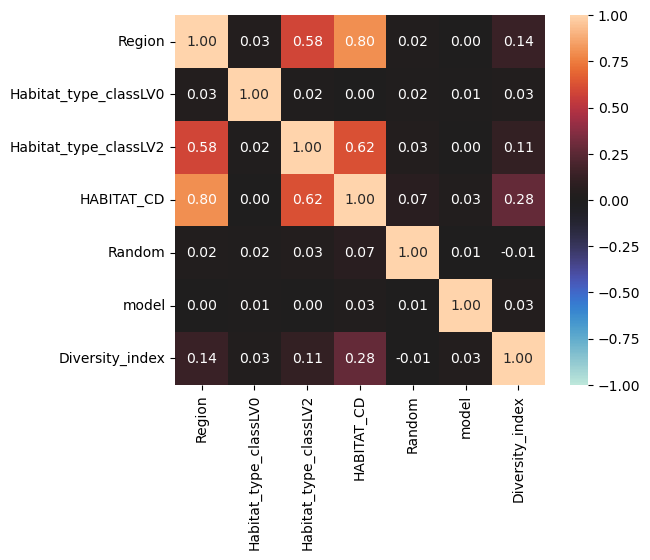

{'corr':                          Region  Habitat_type_classLV0  Habitat_type_classLV2  \
 Region                 1.000000               0.033896               0.579090   
 Habitat_type_classLV0  0.033896               1.000000               0.019428   
 Habitat_type_classLV2  0.579090               0.019428               1.000000   
 HABITAT_CD             0.798268               0.000000               0.619091   
 Random                 0.024245               0.015806               0.032514   
 model                  0.000000               0.009554               0.000000   
 Diversity_index        0.139897               0.029070               0.111244   
 
                        HABITAT_CD    Random     model  Diversity_index  
 Region                   0.798268  0.024245  0.000000         0.139897  
 Habitat_type_classLV0    0.000000  0.015806  0.009554         0.029070  
 Habitat_type_classLV2    0.619091  0.032514  0.000000         0.111244  
 HABITAT_CD               1.000000  0.

In [34]:
#correlation matrix for the categorical columns and the diversity index

df1_corr_cat = df1.loc[:, ['Region', 'Habitat_type_classLV0', 'Habitat_type_classLV2','HABITAT_CD','Random','model','Diversity_index']]

associations(df1_corr_cat)

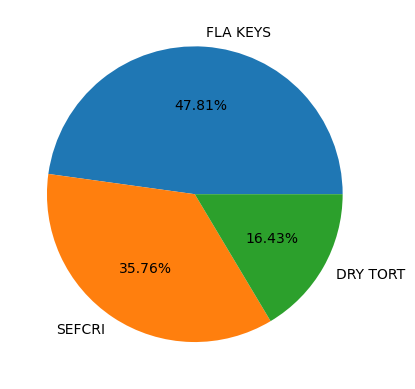

In [9]:
#The repartition of the regions
plt.pie(df1['Region'].value_counts(),labels=df1['Region'].value_counts().index,autopct='%1.2f%%')
plt.show()

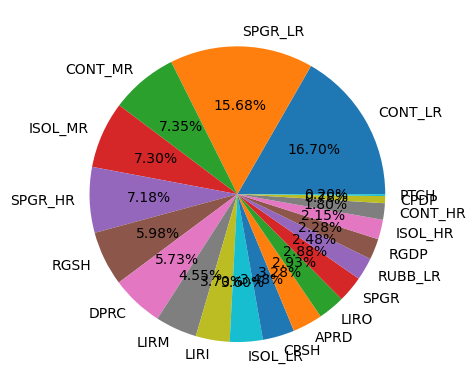

In [35]:
#The repartition of the Habitat_type_classLV0
plt.pie(df1['HABITAT_CD'].value_counts(),labels=df1['HABITAT_CD'].value_counts().index,autopct='%1.2f%%')
plt.show()

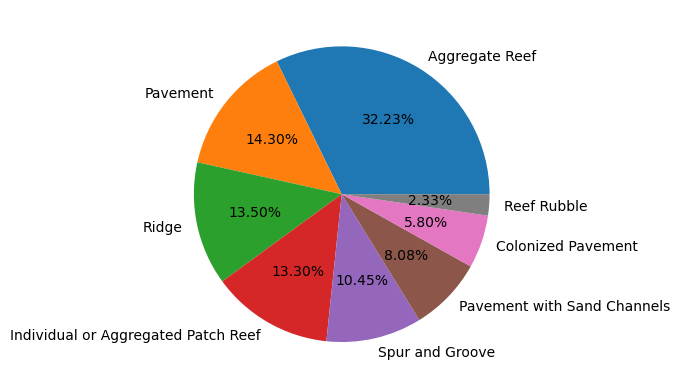

In [4]:
#The repartition of the Habitat_type_classLV0
plt.pie(df1['Habitat_type_classLV2'].value_counts(),labels=df1['Habitat_type_classLV2'].value_counts().index,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='REGION', ylabel='Diversity_index'>

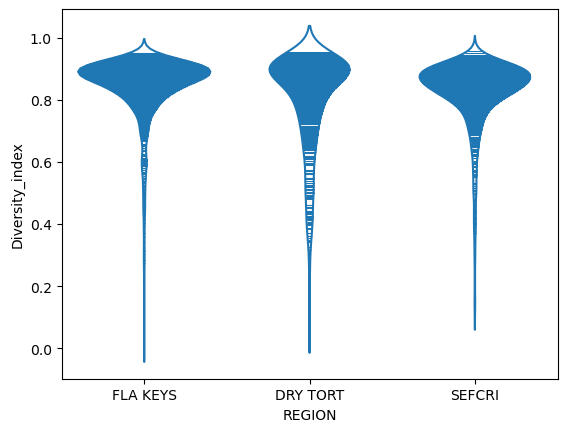

In [20]:
#Repartition of the diversity index in function of the region
sns.violinplot(data=df1, y="Diversity_index", x="REGION", fill=False, inner="stick")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

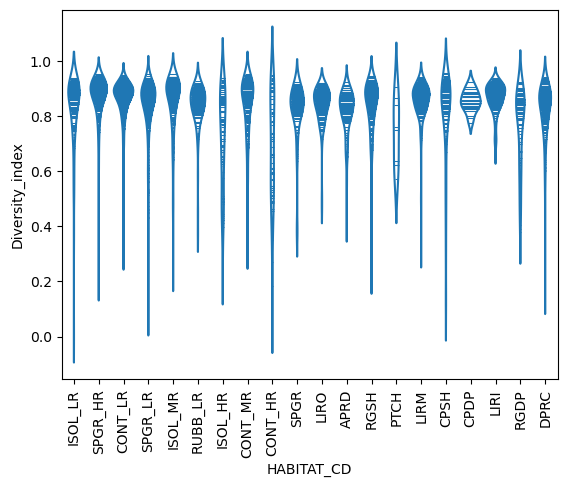

In [38]:
#Repartition of the diversity index in function of the HabitatCD
plot=sns.violinplot(data=df1, y="Diversity_index", x="HABITAT_CD", fill=False, inner="stick")
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None]

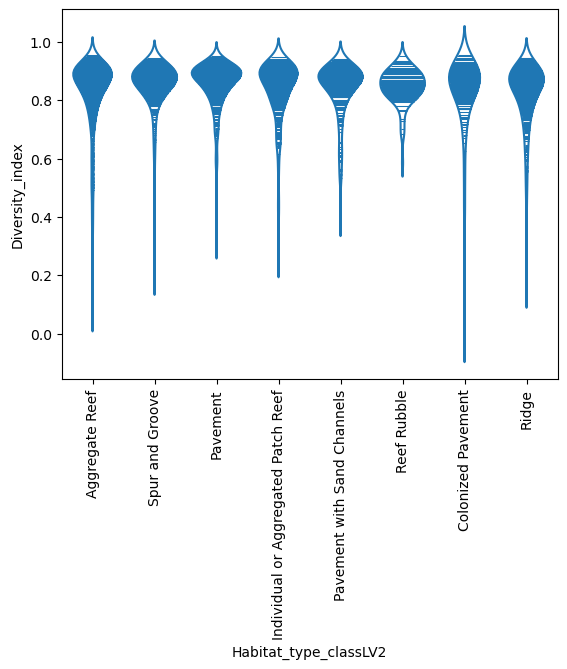

In [27]:
#Repartition of the diversity index in function of the Habitat_type_classLV2
plot=sns.violinplot(data=df1, y="Diversity_index", x="Habitat_type_classLV2", fill=False, inner="stick")
plt.setp(plot.get_xticklabels(), rotation=90)

The correlation matrix shows 3 categorical features is positively correlated with the diversity index: Region, Habitat_type_classLV2, and HABITAT_CD. These features are also highly correlated between them. Especially the Region and HABITAT_CD (score of 0.8) suggested used the both can be a redundancy. 

The pie charts pointed imbalanced in these features. The imbalanced is highest for the region compared to the others features.
In plotting the diversity index in function of Region, HABITAT_CD, and Habitat_type_classLV2 we observed that for all the features categories the core of the diversity index is around 0.8. Some categories shows an heavy tail at the right of the core as it was highlight by the skew analyze.  

*Maybe it will be necessary to take in account this imbalanced to predict the diversity index. Also, the diversity index seems to be better represented by the habitat_type_classLV2 and HABITAT_CD features compared to Region.*

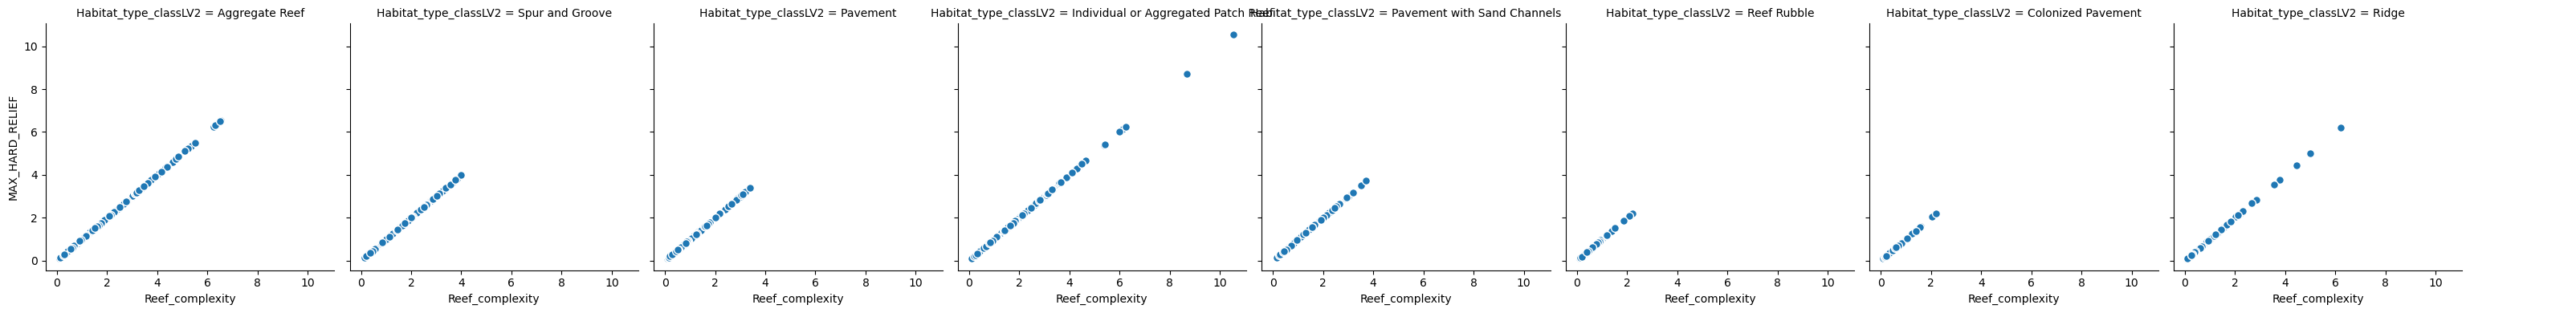

In [42]:
#Relation between the Reef_complexity and MAX_reef in function of habitat_type_classLV2

h = sns.FacetGrid(df1, col="Habitat_type_classLV2", margin_titles=True, height=4)
h.map(plt.scatter, "Reef_complexity", "MAX_HARD_RELIEF", edgecolor="white", s=50, lw=1)
h.add_legend()


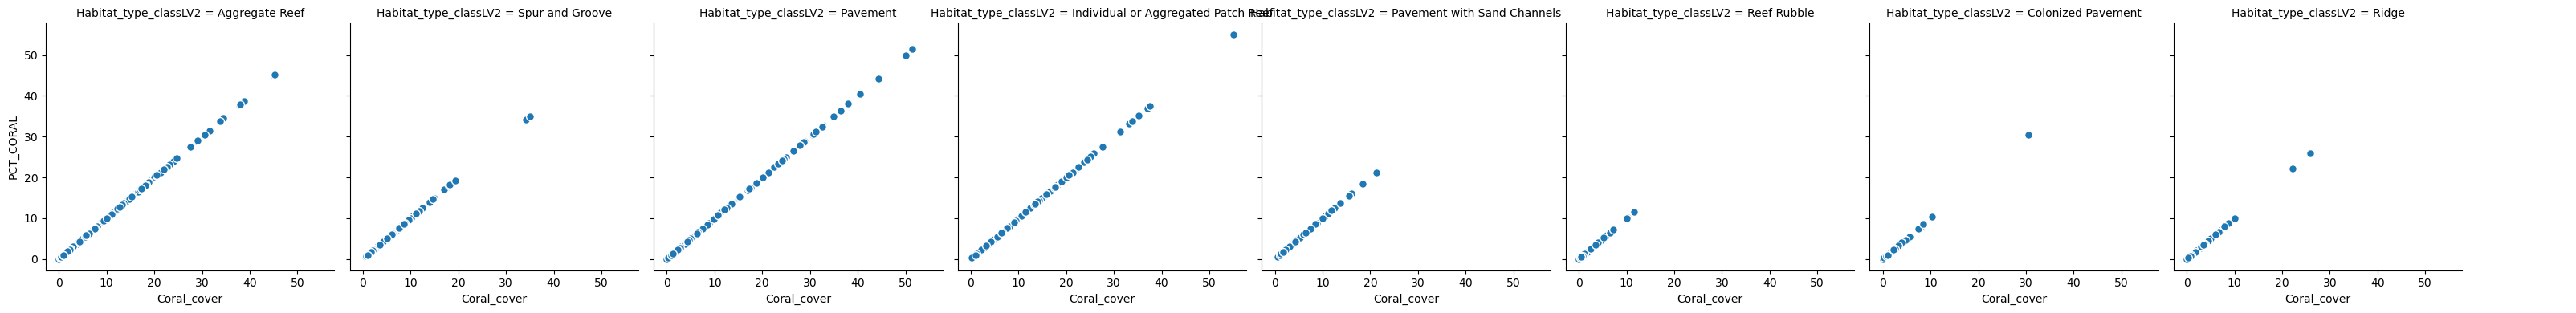

In [43]:
#Relation between the coral_cover and coral_pct in function of habitat_type_classLV2

h = sns.FacetGrid(df1, col="Habitat_type_classLV2", margin_titles=True, height=4)
h.map(plt.scatter, "Coral_cover", "PCT_CORAL", edgecolor="white", s=50, lw=1)
h.add_legend()

The PCT_CORAL and coral_cover as well as the reef_complexity and MAX_HARD_RELIEF varaibles shows a linear correlation suggesting they are redundant.


*It will be better to kept only one of features for each pair to avoid data redundancy.*


Now we look at the correlation between the numerical features and the diversity index.

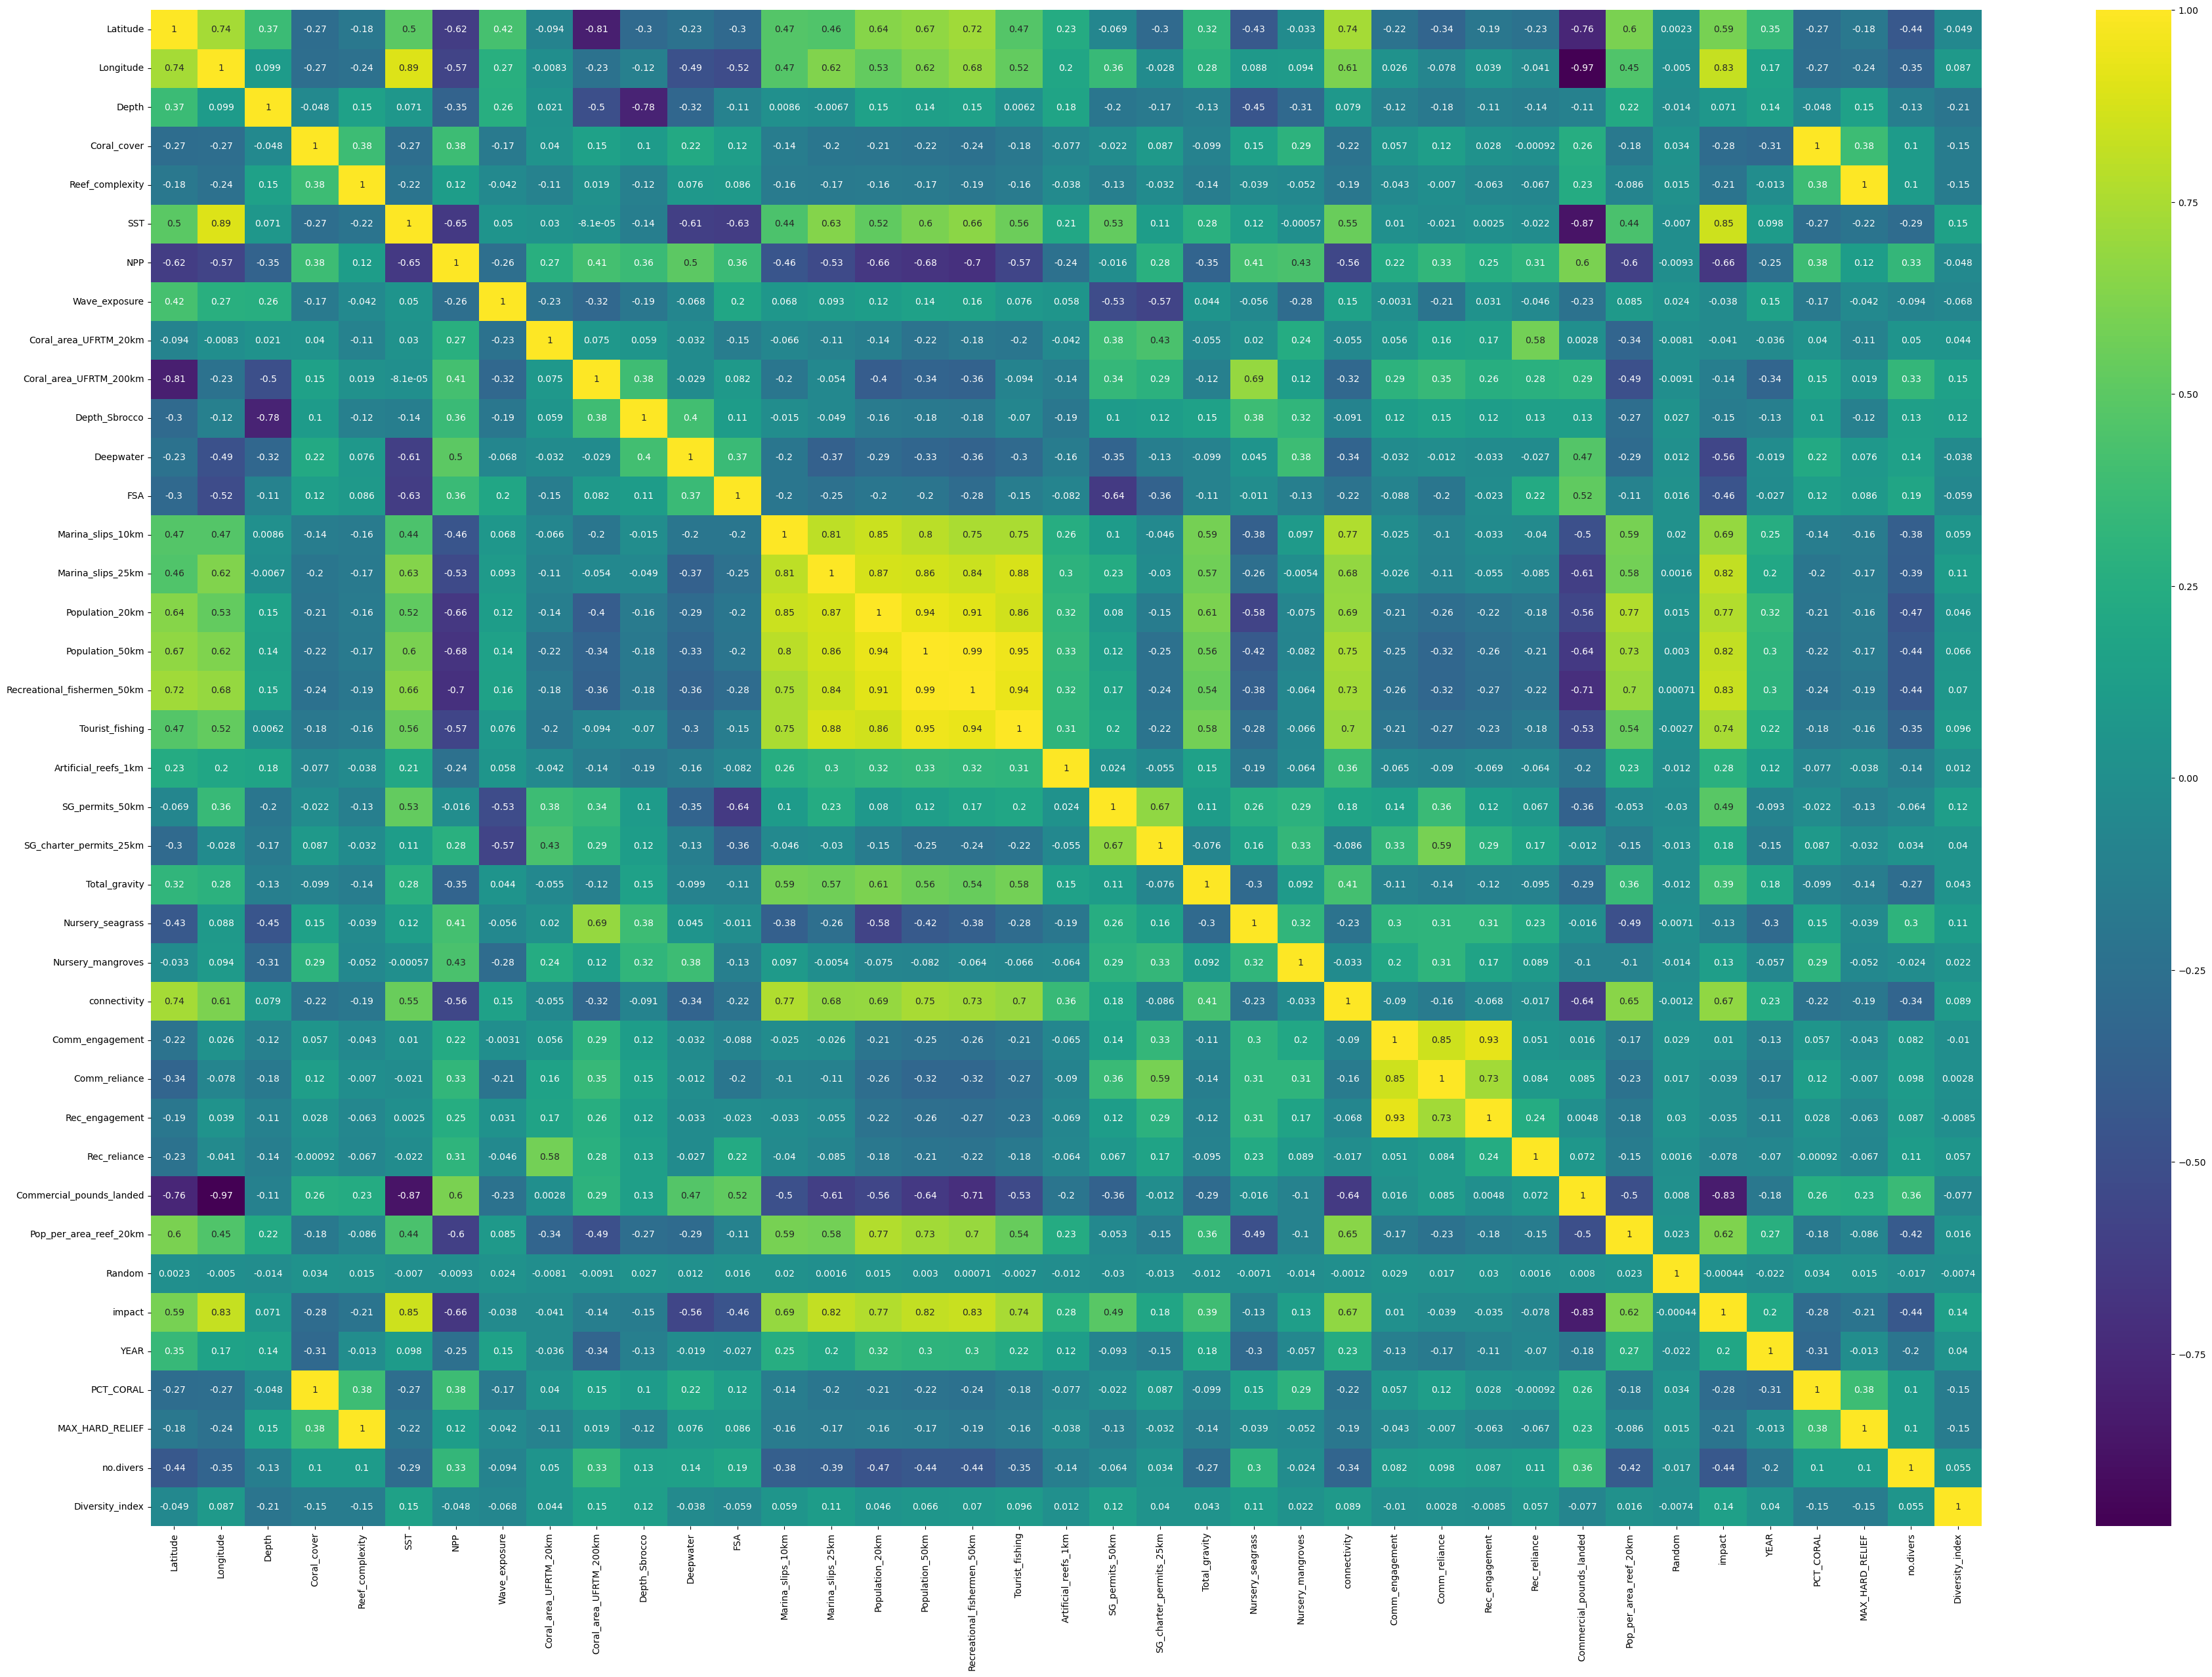

In [44]:
numerical_data=df1.select_dtypes(include=[np.number])

plt.figure(figsize=(45,30))
sns.heatmap(numerical_data.corr(),cbar=True,annot=True,cmap='viridis')
plt.show()

This correlation matrix highlight that:
- in general the correlation between the diversity index and the other variables are weak not less that -0.2 and no more than 0.2. 
- he exist a positive correlation between the diversity index and SST, Coral_aera_UFRTM_20km, Depth_Sbrocco, Marina_slips_10km, SG_permit_50km, Nursery_seagrass, impact
- he exist a negative correlation between the diversity index and PCT_CORAL, MAX_HARD_RELIEF, Depth, Coral_cover, Reef_complexity. 
- The numerical features Nursery_seagrass, nursery_mangrove, connectivity, coral_cover/coral_PCT, reef_complexity/MAX_HARD_REEF, tourist_fishing, marina_slips_25km, SG_permits_50km, Rec_reliance, commercial_pound_landed, artificial_reef, pop_per_aera_reef_20km, recreational_fishermen_50km, Depth, wave_exposure, depth_sbrocco, deepwater, SST, and NPP shows high correlation between them.
- We can see some features have high correlation between the m such as tourist_fishing and pop_per_aera_50km/20km, Marina_slips_25km and Marina_slips_10km, SG_permits_50km and SG_charter_25km. We choose to kept tourist_fishing, Marina_slips_25km, and SG_permits_50km because those features are more linking with other features compared to their "redundant" related. 


*The low linear correlation between the diversity index and the differents features of the dataset complicated the features selection. Comparing the score of the diversity index with the random set a treshold values for us to judge if the linear relation is true or not between the target and a features. It's for that we choose to kept features with better linear relation between them compared with the diversity index and with a correlation score between those features and the diversity index far from the correlation score between the diversity index and the random features.*

In [54]:
#Visualization of the relation between the variables cited above and the diversity index. 
px.imshow(df1.loc[:, ['Depth',
        'Coral_cover', 'Reef_complexity', 'SST', 'NPP',
       'Wave_exposure', 'Depth_Sbrocco',
       'Deepwater','Marina_slips_10km', 'Tourist_fishing',
       'Artificial_reefs_1km','SG_permits_50km', 'Total_gravity','Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Random','Diversity_index']].corr())

## To conclude here:
- The diversity index is a continuous value highly concentrate around 0.8 but whit an heavy tail at the left of the means. 
- It seems to be linked with categorical features: regions, habitat_type_classLV2, and HABITAT_CD. The habitat_type_classLV2, and HABITAT_CD seems to better describe the diversity_index diversity compared to the region. 
- The diversity index shows weak linaer corrlation with those features. Perhaps, some of the features shows strong linear correlation between them allowing to select the informative features to construct the models. 
- Some of those numeric features shows a skew score negative or positive as well as the diversity index shows a negative skew. This highlight the needed to scale the data to built the model. 

## Trait data set exploration

We choose to look also at the trait features because in the litterature most of the models which look at a diversity index used fish trait information. Here the authors describe the coral and relief features as the diversity in function of respectively the coral cover or reef. We takes these features has target to estimate the interest of the other features to predict the diversity index. Also, we have fewer lines here compared to the species dataset because it contain the information about the different 120 fish observed on each study sites (120 lignes agains 3 999 lignes).

In [42]:
df2.head()

Species                            Sp         Family  \
0           Abudefduf saxatilis           Abudefduf_saxatilis  POMACENTRIDAE   
1  Acanthostracion quadricornis  Acanthostracion_quadricornis    OSTRACIIDAE   
2    Acanthostracion polygonius    Acanthostracion_polygonius    OSTRACIIDAE   
3           Acanthurus bahianus           Acanthurus_bahianus   ACANTHURIDAE   
4          Acanthurus chirurgus          Acanthurus_chirurgus   ACANTHURIDAE   

             Genus          Spec  MaxLengthTL  Body_size_max  MaxLengthSL  \
0        Abudefduf     saxatilis        22.90           23.0        16.82   
1  Acanthostracion  quadricornis        55.00           55.0        45.10   
2  Acanthostracion    polygonius        50.00           50.0        41.00   
3       Acanthurus      bahianus        46.48          381.0        38.10   
4       Acanthurus     chirurgus        39.00           39.0        31.98   

   MaxJuvLength  AspectRatio  AspectRatio_Q    Log_AR       swim_type  \
0           6.0      1.53883       1.538830  0.431022        pectoral   
1           NaN      1.36959       1.369590  0.314511  dorsal_ventral   
2           NaN      0.38000       0.375069       NaN  dorsal_ventral   
3           7.0      2.42851       2.430000  0.887278        pectoral   
4           8.0      1.87360       1.867165  0.627862        pectoral   

         swim_mode           body_shape  Total.length.Body.depth.ratio  \
0        labriform  short and / or deep                           2.50   
1  tetraodontiform  short and / or deep                           3.30   
2  tetraodontiform  short and / or deep                           3.23   
3        labriform           short/deep                           2.70   
4        labriform           short/deep                           2.30   

   presence_defense  ComDepthMax  DepthMax  Depth_min  Depth_max  Depth_range  \
0                 0           10        20        0.0       40.0         40.0   
1                 1           30        80        1.0       80.0         79.0   
2                 1           42        90        3.0       80.0         77.0   
3                 1           25        40        2.0       40.0         38.0   
4                 1           15        25        2.0       25.0         23.0   

   Troph  Trophic_level Diet.x Diet.y  Nocturnal Diel_activity  shoaling  \
0   3.82           38.0     H      om          0           day  shoaling   
1   2.68           27.0      C     im          0           day  solitary   
2   2.03            2.0      H     is          0           day  solitary   
3   2.00            2.0      H     hd          0           day  shoaling   
4   2.09            2.0      H     hd          0           day  shoaling   

  Size_group Position.in.water.column. Level_water  Specialist  Fished Spawn  \
0     smallg                  demersal         low         1.0       1   DEM   
1        sol                  demersal      bottom         0.0       1   BAL   
2        sol                  demersal         low         0.0       1   BAL   
3       medg                  demersal         low         0.0       1   PEL   
4       medg                  demersal         low         0.0       1   PEL   

   Spawning Brackish Multihabitat Rafter     Relief     Coral  Cryptic  \
0  demersal       NO           NO    YES  19.283335  2.155649        0   
1   pelagic       NO          YES    YES  -4.402829  1.317257        0   
2   pelagic       NO           NO     NO  -0.916844  0.822614        0   
3   pelagic       NO          YES     NO  -6.458161 -2.629728        0   
4   pelagic       NO          YES     NO  -6.180233 -3.265823        0   

   random Home_range  
0    9316        mob  
1    6902        mob  
2    5100        mob  
3    1201        mob  
4    3688        mob

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        120 non-null    object 
 1   Sp                             120 non-null    object 
 2   Family                         120 non-null    object 
 3   Genus                          120 non-null    object 
 4   Spec                           120 non-null    object 
 5   MaxLengthTL                    120 non-null    float64
 6   Body_size_max                  119 non-null    float64
 7   MaxLengthSL                    120 non-null    float64
 8   MaxJuvLength                   67 non-null     float64
 9   AspectRatio                    120 non-null    float64
 10  AspectRatio_Q                  120 non-null    float64
 11  Log_AR                         112 non-null    float64
 12  swim_type                      120 non-null    obj

In [44]:
df2.describe()

MaxLengthTL  Body_size_max  MaxLengthSL  MaxJuvLength  AspectRatio  \
count   120.000000     119.000000   120.000000     67.000000   120.000000   
mean     43.986750      90.361345    36.606083     11.208955     1.733621   
std      38.674115     137.771657    33.009805      7.312375     0.774097   
min       4.000000       4.000000     3.280000      3.000000     0.380000   
25%      15.240000      22.500000    12.500000      6.000000     1.197148   
50%      35.000000      46.000000    28.700000      9.000000     1.550755   
75%      57.000000      90.000000    48.367500     15.000000     2.063108   
max     200.000000     863.000000   178.880000     41.000000     4.515040   

       AspectRatio_Q      Log_AR  Total.length.Body.depth.ratio  \
count     120.000000  112.000000                     119.000000   
mean        1.728393    0.459358                       3.934370   
std         0.781303    0.421621                       2.006749   
min         0.375069   -0.784940                       1.600000   
25%         1.195903    0.179941                       2.900000   
50%         1.550755    0.438712                       3.500000   
75%         2.104204    0.724213                       4.500000   
max         4.515040    1.507414                      16.700000   

       presence_defense  ComDepthMax    DepthMax   Depth_min   Depth_max  \
count        120.000000   120.000000  120.000000  119.000000  119.000000   
mean           0.166667    32.525000   69.125000    2.310924   70.798319   
std            0.374241    36.503473   68.391921    3.931075   65.335585   
min            0.000000     2.000000    3.000000    0.000000    8.000000   
25%            0.000000    15.000000   25.000000    0.500000   30.000000   
50%            0.000000    25.000000   50.000000    1.000000   50.000000   
75%            0.000000    40.000000   91.250000    3.000000   91.000000   
max            1.000000   330.000000  400.000000   30.000000  400.000000   

       Depth_range       Troph  Trophic_level   Nocturnal  Specialist  \
count   119.000000  120.000000     119.000000  120.000000  118.000000   
mean     68.487395    3.254917      27.327731    0.158333    0.406780   
std      64.327402    0.760697      15.339718    0.366584    0.493328   
min       8.000000    2.000000       2.000000    0.000000    0.000000   
25%      30.000000    2.680000      12.500000    0.000000    0.000000   
50%      49.000000    3.460000      34.000000    0.000000    0.000000   
75%      87.500000    3.740000      37.000000    0.000000    1.000000   
max     398.000000    4.510000      45.000000    1.000000    1.000000   

           Fished      Relief       Coral     Cryptic       random  
count  120.000000  109.000000  109.000000  120.000000   120.000000  
mean     0.533333    4.522800    1.523872    0.091667  4852.683333  
std      0.500979    7.271063    5.315977    0.289765  2903.997219  
min      0.000000  -13.971772  -10.247201    0.000000    35.000000  
25%      0.000000   -0.575752   -1.162476    0.000000  2278.250000  
50%      1.000000    5.131455    1.765955    0.000000  5061.000000  
75%      1.000000    9.445818    3.199064    0.000000  7057.000000  
max      1.000000   21.161932   41.486844    1.000000  9917.000000

In [56]:
df2_num = df2.select_dtypes(include=np.number)

df2_num.skew()

MaxLengthTL                      1.921563
Body_size_max                    3.477251
MaxLengthSL                      1.994176
MaxJuvLength                     1.578278
AspectRatio                      1.146699
AspectRatio_Q                    1.176920
Log_AR                          -0.106224
Total.length.Body.depth.ratio    3.635590
presence_defense                 1.811578
ComDepthMax                      5.376823
DepthMax                         2.710811
Depth_min                        4.530833
Depth_max                        2.836940
Depth_range                      2.870615
Troph                           -0.403681
Trophic_level                   -0.837932
Nocturnal                        1.895651
Specialist                       0.384440
Fished                          -0.135328
Relief                          -0.119473
Coral                            3.774618
Cryptic                          2.866148
random                           0.080709
dtype: float64

In [45]:
df2.isna().sum()

Species                           0
Sp                                0
Family                            0
Genus                             0
Spec                              0
MaxLengthTL                       0
Body_size_max                     1
MaxLengthSL                       0
MaxJuvLength                     53
AspectRatio                       0
AspectRatio_Q                     0
Log_AR                            8
swim_type                         0
swim_mode                         0
body_shape                        0
Total.length.Body.depth.ratio     1
presence_defense                  0
ComDepthMax                       0
DepthMax                          0
Depth_min                         1
Depth_max                         1
Depth_range                       1
Troph                             0
Trophic_level                     1
Diet.x                            0
Diet.y                            1
Nocturnal                         0
Diel_activity               

We observed that:
- Here a lot of the features are categorical and in the numerical features few values are missing.
- Many has a high positive or negative skew. Especialy the Coral target which is highest compared to the skew score of the Relief. 
- the description of the categorical features point the existence of boolean features (Brackish, Multihabitat, Rafter). 

 We observed less missing values in this dataset compared to the trait dataset:
 | Features | Number of missing value | Description of the features with missing values |
|:---------:|:-------------------------:|:-----------------------------:|
|Body_size_max|             1| represent the maximum total length in cm overall and it is not used by the authors for their model|
| MaxJuvLength |               53| represent the maximum length of juvenile stages |
| Total.length.Body.depth.ratio|       1| which is a numerical variable describing body fineness; calculated by total length of fish divided by height at the pectoral fin |
|   Depth_min, Depth_max, Depth_range       |         1 for each| they represent each a paramater about the depth in the water we can find the fish|
|   Trophic_level        |         1| they represent trophic level of species and contain typo information. The author don't use it in their model and she is similar to the trophic variable.|
|  Diet.y        |         1| describe the fish diet and it is not use by the authors in their model|
|Diel_activity | 1| describe the moment of the day the fish is active (day, nigth or both) |
| Size_group | 1| described the type of group the fish is attached (solitary, paired, small group, medium group, large group)|
| Level_water | 1| common position of the fish in the column water, not used by the authors in their model|
| Specialist | 2 | which is a binary variable with 1 equal to the presence of the fish in the coral reefs|
| Relief | 11 | which represent the percent contribution of maximum hard relief to overall fish density derived from density models|
| Coral | 11 | represent the contribution of coral cover to overall fish density derived from density models|
| Home_range | 1| represent the size of home range meaning mobile, highly mobile, and sedentary|

In first we look at the distribution of the observation of the Coral and Relief targets.

In [94]:
#the repartition of the diversity index values
px.scatter(data_frame=df2['Coral'])

In [98]:
#the repartition of the diversity index values
px.scatter(data_frame=df2['Relief'])

We observed that, the coral shows an outlier and the core of the observation is between -10 and 10, highly concentrate around 0. The relief values are more spread between -5 to 20.

After that we look at the correlation between the categorical features and the coral, relief features.

In [87]:
df2_cat = df2.select_dtypes(exclude=np.number)
df2_cat.describe()

Species                   Sp    Family     Genus  \
count                   120                  120       120       120   
unique                  120                  120        30        58   
top     Abudefduf saxatilis  Abudefduf_saxatilis  LABRIDAE  Haemulon   
freq                      1                    1        24         9   

             Spec swim_type       swim_mode body_shape Diet.x Diet.y  \
count         120       120             120        120    120    119   
unique        115         5               9          7      7      7   
top     chrysurus  pectoral  subcarangiform   fusiform      C     im   
freq            2        53              43         37     52     57   

       Diel_activity  shoaling Size_group Position.in.water.column.  \
count            119       120        119                       120   
unique             3         4          5                         3   
top              day  solitary        sol                  demersal   
freq             101        71         53                       101   

       Level_water Spawn Spawning Brackish Multihabitat Rafter Home_range  
count          119   119      119      120          120    120        119  
unique           3     4        3        2            2      2          3  
top            low   PEL  pelagic       NO          YES     NO        mob  
freq            80    86       90      106           73    103         71

In [92]:
df2_cat_corr = df2.loc[:, ['Species', 'Sp', 'Family', 'Genus', 'Spec','swim_type', 'swim_mode', 'body_shape','Diet.x', 'Diet.y', 'Nocturnal', 'Diel_activity',
       'shoaling', 'Size_group','Level_water', 'Specialist', 'Fished', 'Spawn', 'Spawning', 'Brackish', 'Multihabitat', 'Position.in.water.column.',
       'Rafter', 'Cryptic','Home_range','random' , 'Relief', 'Coral']]

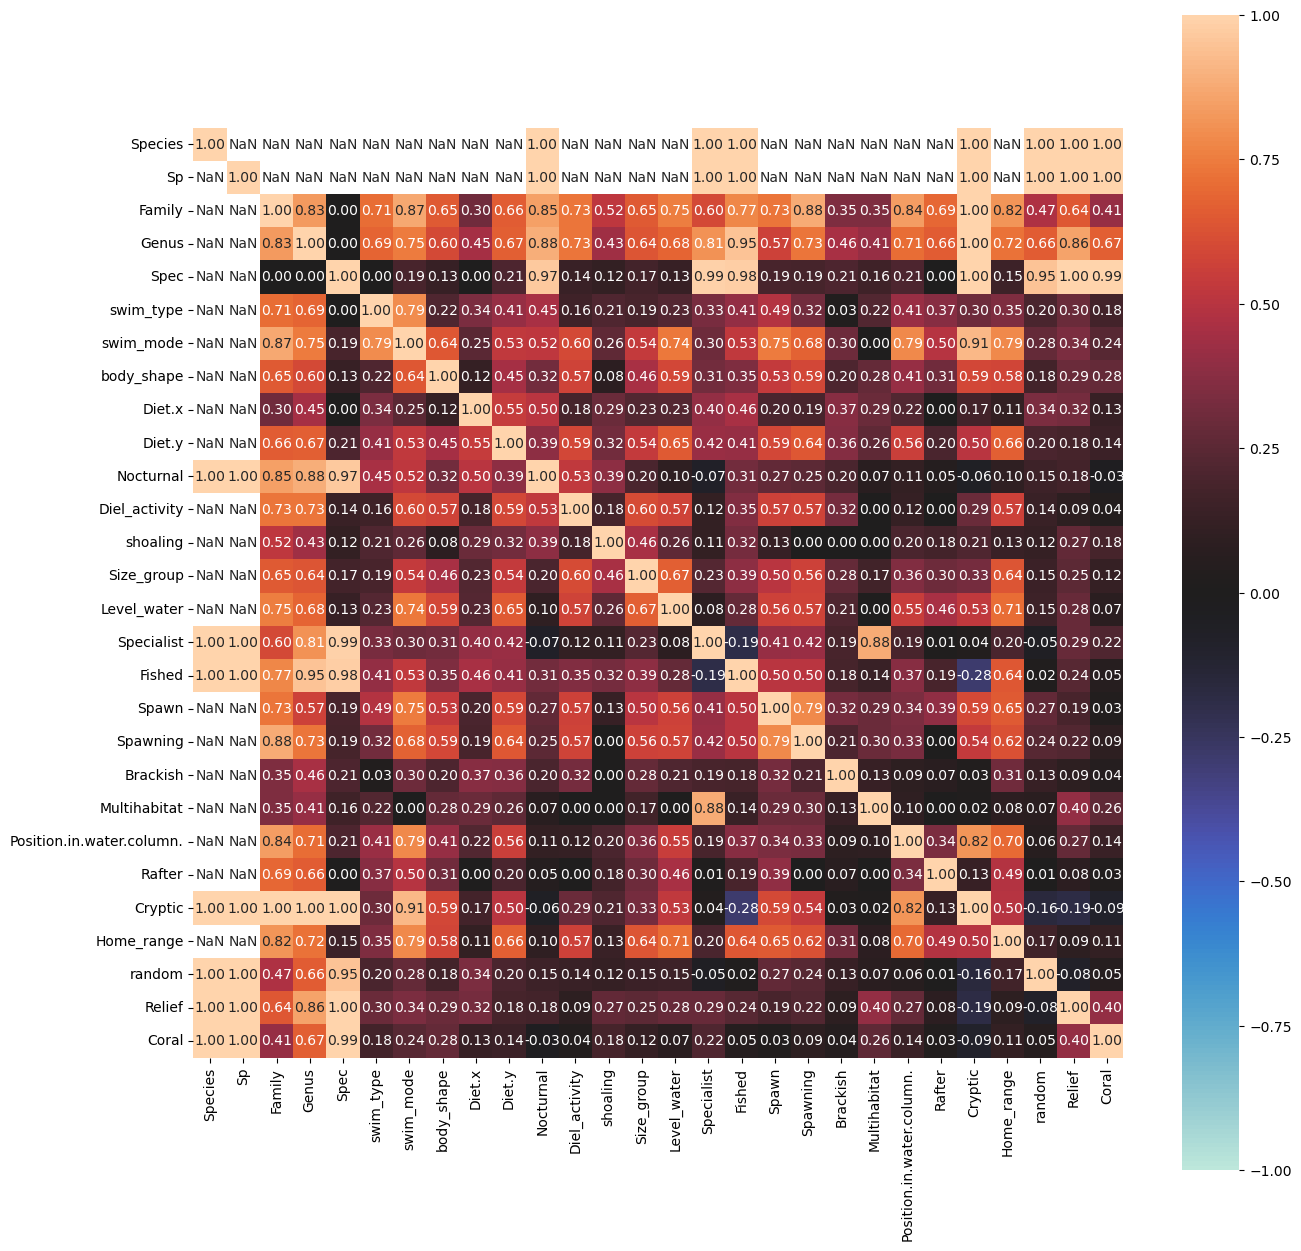

{'corr':                            Species   Sp    Family     Genus      Spec  \
 Species                        1.0  0.0  0.000000  0.000000  0.000000   
 Sp                             0.0  1.0  0.000000  0.000000  0.000000   
 Family                         0.0  0.0  1.000000  0.829993  0.000000   
 Genus                          0.0  0.0  0.829993  1.000000  0.000000   
 Spec                           0.0  0.0  0.000000  0.000000  1.000000   
 swim_type                      0.0  0.0  0.710184  0.686928  0.000000   
 swim_mode                      0.0  0.0  0.869880  0.747368  0.191823   
 body_shape                     0.0  0.0  0.652303  0.600685  0.128512   
 Diet.x                         0.0  0.0  0.304856  0.449362  0.000000   
 Diet.y                         0.0  0.0  0.662057  0.671257  0.208582   
 Nocturnal                      1.0  1.0  0.846027  0.883032  0.968229   
 Diel_activity                  0.0  0.0  0.727293  0.731083  0.140010   
 shoaling                     

In [93]:
associations(df2_cat_corr, figsize=(15,15))

The correlation matrix shows like in the species table, the correlation between the targets and the features are weak (between 0.2 and 0.07). Some shows very good linear correlation: Multihabitat, Specialist, shoaling, body_shape, swim_mode, Spec, Genus, and family with coral and relief. 

We then look at the repartition of the coral and relief observation in function of Multihabitat, Specialist, shoaling, body_shape, and swim_mode. Then we will look at the repartition of the species in function of the family to look at the repartition of the species in function of the family.

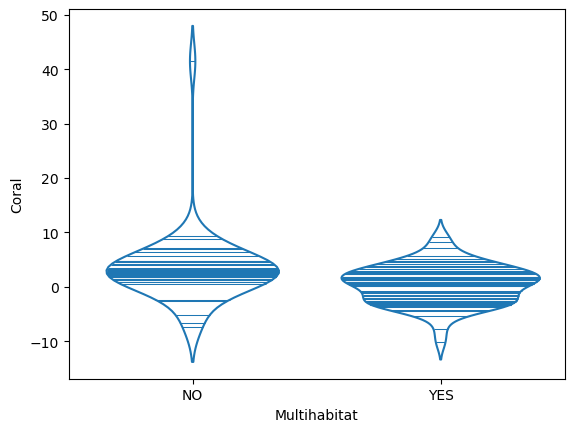

In [82]:
#Repartition of the coral observation in function of Multihabitat
plot1=sns.violinplot(data=df2, y="Coral", x="Multihabitat", fill=False, inner="stick")

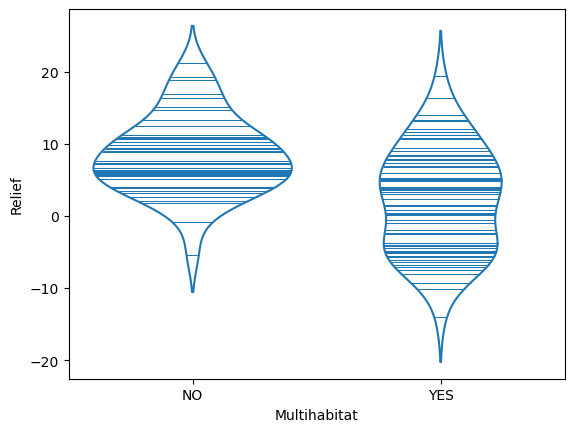

In [81]:
#Repartition of the relief observation in function of Multihabitat
plot2=sns.violinplot(data=df2, y="Relief", x="Multihabitat", fill=False, inner="stick")

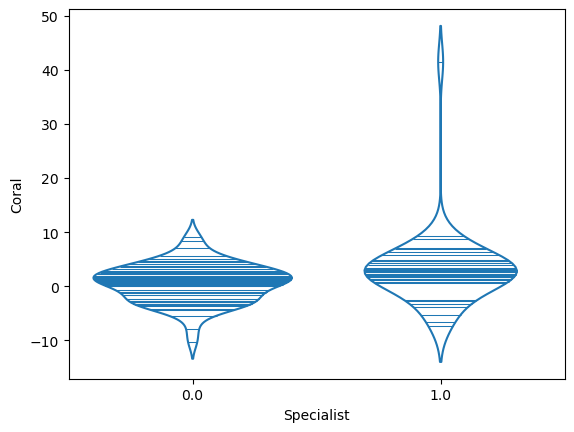

In [80]:
#Repartition of the coral observation in function of Specialist
plot1=sns.violinplot(data=df2, y="Coral", x="Specialist", fill=False, inner="stick")

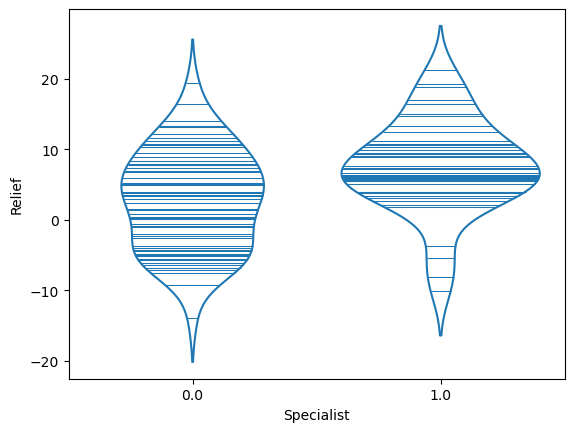

In [79]:
#Repartition of the Relief observation in function of Specialist
plot1=sns.violinplot(data=df2, y="Relief", x="Specialist", fill=False, inner="stick")

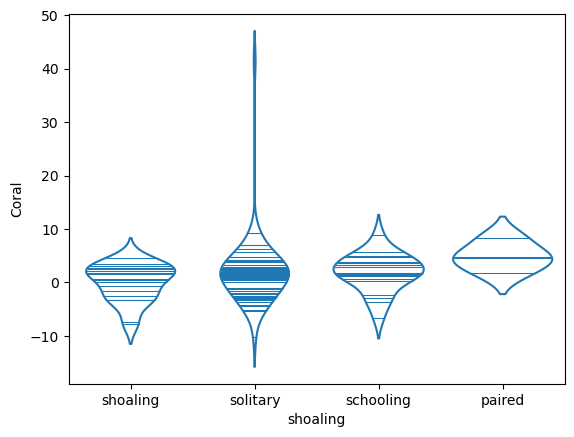

In [77]:
#Repartition of the coral observation in function of Shoaling
plot1=sns.violinplot(data=df2, y="Coral", x="shoaling", fill=False, inner="stick")

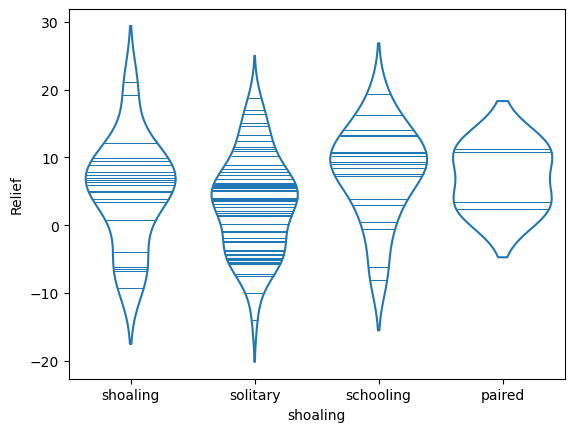

In [78]:
#Repartition of the relief observation in function of Shoaling
plot1=sns.violinplot(data=df2, y="Relief", x="shoaling", fill=False, inner="stick")

[None, None, None, None, None, None, None]

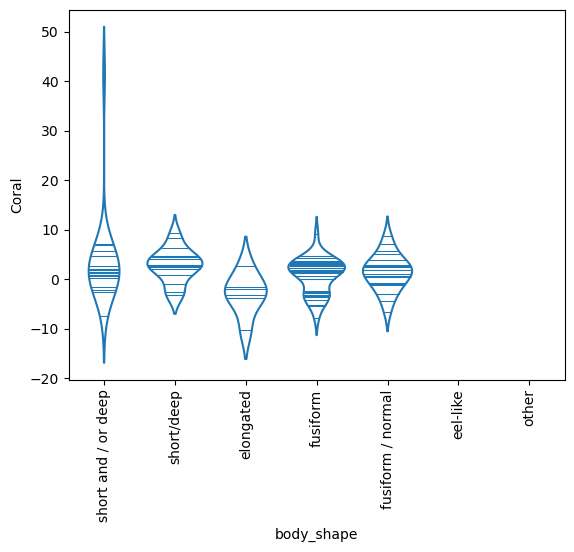

In [76]:
#Repartition of the coral observation in function of body_shape
plot1=sns.violinplot(data=df2, y="Coral", x="body_shape", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None]

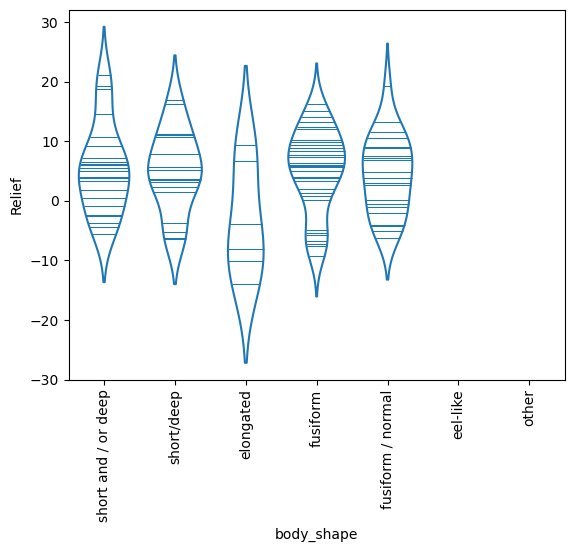

In [83]:
#Repartition of the relief observation in function of body_shape
plot1=sns.violinplot(data=df2, y="Relief", x="body_shape", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None]

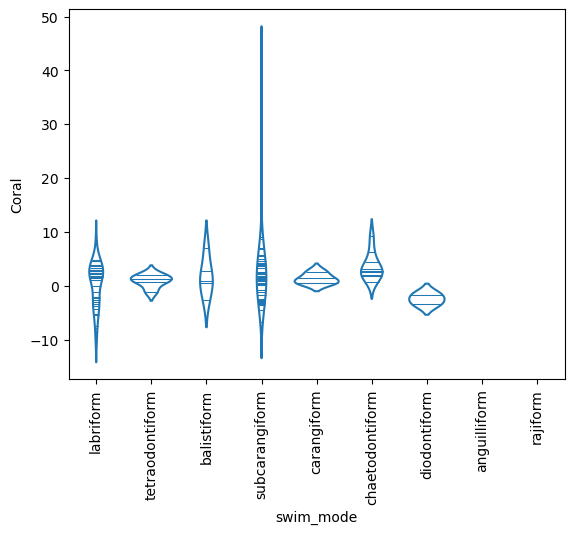

In [84]:
#Repartition of the coral observation in function of swim_mode
plot1=sns.violinplot(data=df2, y="Coral", x="swim_mode", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None]

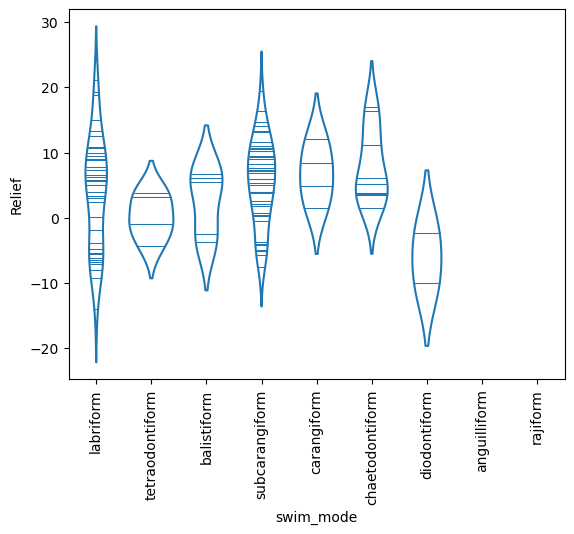

In [85]:
#Repartition of the relief observation in function of swim_mode
plot1=sns.violinplot(data=df2, y="Relief", x="swim_mode", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

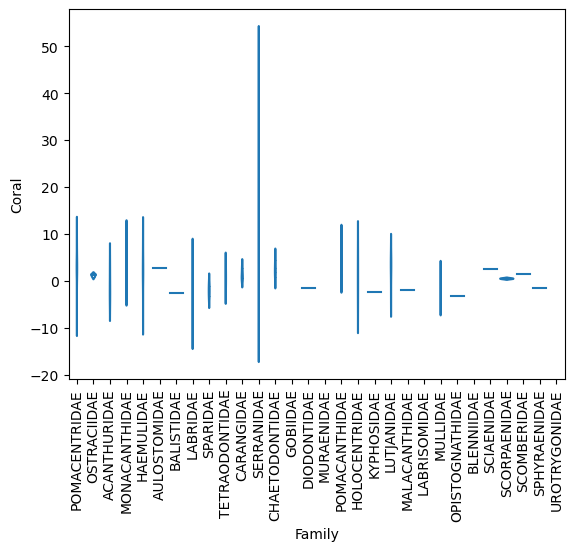

In [88]:
#Repartition of the coral observation in function of family
plot1=sns.violinplot(data=df2, y="Coral", x="Family", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

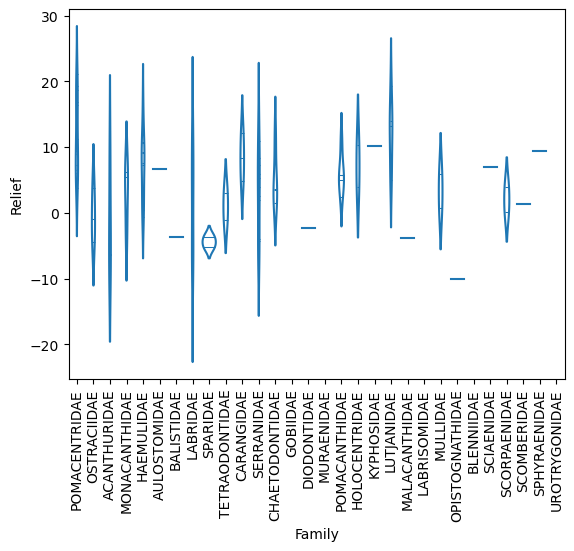

In [89]:
#Repartition of the relief observation in function of family
plot1=sns.violinplot(data=df2, y="Relief", x="Family", fill=False, inner="stick")
plt.setp(plot1.get_xticklabels(), rotation=90)

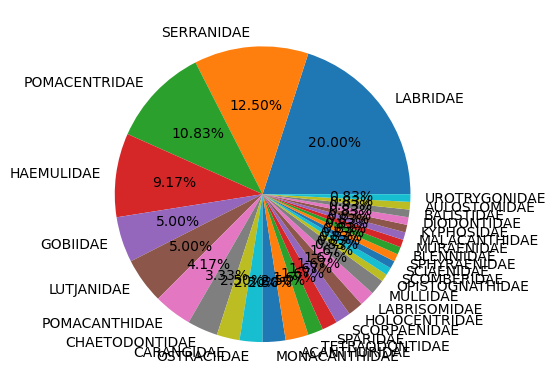

In [143]:
#the repartition of the observation accross the species family feature

plt.pie(df2['Family'].value_counts(),labels=df2['Family'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [145]:
Family_nb_dif_Sp = df2.groupby('Family')['Sp'].unique().to_dict()
for keys in Family_nb_dif_Sp:
    nb_species = len(np.unique(Family_nb_dif_Sp[keys]))
    print(f'for the family: {keys} the number of different species is: {nb_species}')

for the family: ACANTHURIDAE the number of different species is: 3
for the family: AULOSTOMIDAE the number of different species is: 1
for the family: BALISTIDAE the number of different species is: 1
for the family: BLENNIIDAE the number of different species is: 1
for the family: CARANGIDAE the number of different species is: 3
for the family: CHAETODONTIDAE the number of different species is: 4
for the family: DIODONTIDAE the number of different species is: 1
for the family: GOBIIDAE the number of different species is: 6
for the family: HAEMULIDAE the number of different species is: 11
for the family: HOLOCENTRIDAE the number of different species is: 2
for the family: KYPHOSIDAE the number of different species is: 1
for the family: LABRIDAE the number of different species is: 24
for the family: LABRISOMIDAE the number of different species is: 2
for the family: LUTJANIDAE the number of different species is: 6
for the family: MALACANTHIDAE the number of different species is: 1
for the fa

We observed that:
- The coral observation are more spread than relief and shows for some categories an heavy tail at the right. On the contrary, the relief observation are more centered accross the different categories. 
- Interestingly the coral cover is favorable for the fish in solitary and paired group type, shotr and/or deep as well as fusiform/normal body shape and final to swim_mode subcarangiform and carangiform. The relief is more favorable for shoaling and solitary group type as well as chaetodontiform and carangiform swim mode. 
- In looking at the repartition of the coral/relief observation in function of the species family we observed that, the coral cover seems to prevent the presence of certain fish family. Only the Serranidae shows a spread repartion accross the different coral values the others families are concentrate between -10 and 10. Concerning the relief, it seems we observed more fish but most of the family are in the same range of relief (between 0 and 20).  


*This highlight that, the fish trait are related to their environment and potentialy the diversity of fish in a site evolve in function of the site properties.*


- 4 fish families (Labridae, serranidae, pomacentriade, haemuliade) shows a high number of different fish species present in the studying sites.
- The most common swim mode is subcarangiform. The most common body shape is fusiform and the most common diel activity is day.
- Surprinsingly the most common groupe size is solitary. 
- Many demersal species engage in pelagic spawning suggesting an evolutionary and environmental advantage in the coral space for nutriment accessing, and birth enhancing their survival in that site. 

Then we look at the numerical features to see the relation between them. 

In [90]:
#correlation between the numeric value of the trait dataset
numerical=df2.select_dtypes(include=np.number)

#withdraw of the categorical columns in boolean 1/0 
numerical = numerical.loc[:, ['MaxLengthTL', 'Body_size_max', 'MaxLengthSL', 'MaxJuvLength',
       'AspectRatio', 'AspectRatio_Q', 'Log_AR',
       'Total.length.Body.depth.ratio', 'ComDepthMax',
       'DepthMax', 'Depth_min', 'Depth_max', 'Depth_range', 'Troph',
       'Trophic_level', 'Relief', 'Coral',
     'random']]

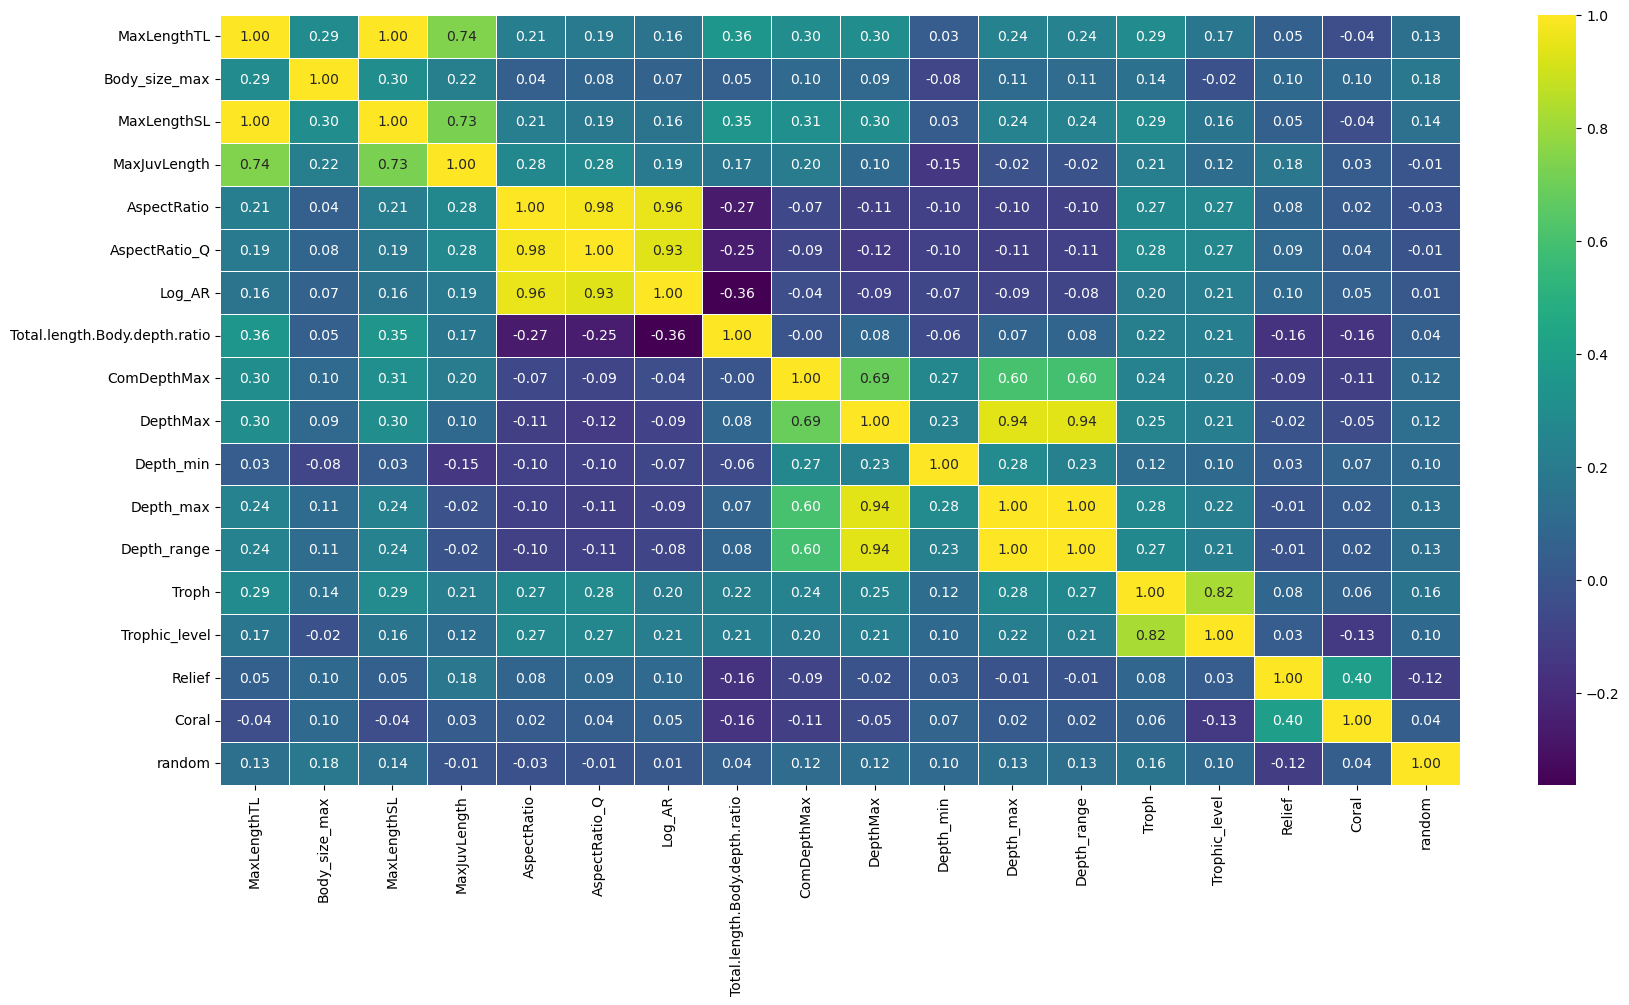

In [91]:
#Correlation matrix for the numerical columns
corr=numerical.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", cbar=True,linewidths=.5)
plt.show()

Here we look at the correlation between the coral and relief variable against the other features because the authors describe this 2 variables are realted to the diveristy index:
- globally the correlation score between the numerical features and the coral/relief is weak compared to the correlation between coral/relief and the categorial columns.
- It exist a high positive correlation between relief and coral. 
- it exist a negative correlation between coral and trophic_level, ComDepthMax, Total.length.body.depht.ratio.
- It seems that, the relief don't shows real linear correlation with any of the features either coral.

To look the correlation closely between those variables we will reduce the data set to this variables. 

## To conclude on the trait table exploration:

- The numerical features shows low correlation score with the targets compraed to the categorical features.
- We observed 4 dominantes family of fish in that data set : Labridae, serranidae, pomacentriade, haemuliade. In the litterature it is describe the number of different species per familly present in a site can be a clues of diversity (Loiseau and Gaertner *et al*, 2015). 
- The site topology seems to influence the repartition of the observation highlithing the relation between the environment caracteristic and the fish diversity.